In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
from IPython.display import Image

In [ ]:
# Задания для самостоятельного решения
# 1. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.
# A - результаты для выборки людей получающих препарат А.
# B - результаты для другой выборки людей, получающих препарат B.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B780B17C0>]],
      dtype=object)

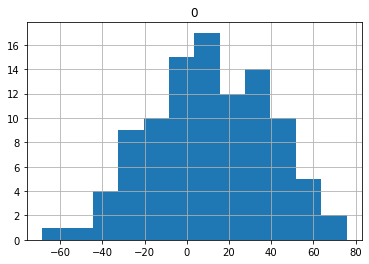

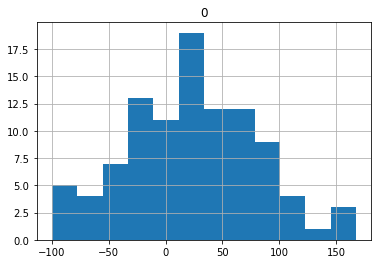

In [2]:
#проведем рандомную генерацию чисел, разделим на группы
np.random.seed(11)
A=stats.norm.rvs(scale=30,loc=11,size=100)
B=A+stats.norm.rvs(scale=54,loc=11,size=100)

#для простоты сравнения, а также, чтобы посмотреть тип распределения выведем А и В на график
pd.DataFrame(A).hist(bins = 12)
pd.DataFrame(B).hist(bins = 12)

In [ ]:
# Распределение отличается от нормального у группы В, поэтому для расчета зависимости/различий между группами 
# логичнее будет применить U-тест по методу Манна и Уитни.
# Гипотезы:
# Н:0 Нет существенных различий в эффекте препарата А от препарата В   
# Н:1 У пациентов имеются различия принимающих препарат А от принимающих препарат В
# Параметр Alpha установим на 5% уровень.

In [3]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Не можем отклонить гипотезу H0 (Нет существенных различий в эффекте препарата А от препарата В)')
else:
    print('Отклоняем гипотезу H0, принимаем H1 (У пациентов, принимающих препараты, имеются различия)')

Statistics=4343.000, p=0.054
Не можем отклонить гипотезу H0 (Нет существенных различий в эффекте препарата А от препарата В)


In [ ]:
# 2. Вам даны результаты проверки двух препаратов. Требуется оценить, есть ли различие в эффекте у этих пациентов.
# А - те же люди, но без препарата.
# B - выборка получающая препарат B

In [4]:
np.random.seed(11)
A_w=stats.norm.rvs(scale=30,loc=11,size=100)
B_w=A+stats.norm.rvs(scale=54,loc=11,size=100)

In [ ]:
# В данном варианте можно оценить группу А и В как зависимые, их данные - количественные, а по распределению - нормальные.
# Т.о. будем оценивать сходство/различия в эффекте применения препарата с помощью тестирования методом W-критерия Вилкоксона.
# Гипотезы:
# H0: Различия в группах не существенны, применение препарата не оказывает значимого влияния.
# H1: Различия в группах существенны, применение препарата имеет результат
# Параметр Alpha установим на 5% уровень.

In [5]:
from scipy.stats import wilcoxon
stat_w, p_w = wilcoxon(A_w, B_w)
print('Statistics=%.3f, p=%.3f' % (stat_w, p_w))
alpha = 0.05
if p_w > alpha:
    print('Не можем отклонить гипотезу H0 (различия в группах не существенны, применение препарата не оказывает значимого влияния)')
else:
    print('Отклоняем гипотезу H0, принимаем H1 (Различия в группах существенны, применение препарата имеет результат)')

Statistics=1930.000, p=0.041
Отклоняем гипотезу H0, принимаем H1 (Различия в группах существенны, применение препарата имеет результат)


In [ ]:
# 3. Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, 
# третью группу огурцов будем поливать минералкой. Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. 
# Если ли эффект от удобрения по сравнению с минералкой?
# water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
# nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
# mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

In [6]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]
from scipy.stats import f_oneway
f_oneway(water, nutri, mineral)

F_onewayResult(statistic=12.525963044834192, pvalue=2.9240047906326866e-05)

In [7]:
print(np.mean(water), np.mean(nutri), np.mean(mineral))

2.85 4.666666666666667 2.8095238095238093


In [ ]:
# Видно, что выделяется от других групп nutri. Для частоты экперимента, проведем сравнения между каждой группой через t-тест

In [8]:
stats.ttest_ind(water, nutri)

Ttest_indResult(statistic=-4.132232441883167, pvalue=0.0001840453200503376)

In [9]:
stats.ttest_ind(water, mineral)

Ttest_indResult(statistic=0.10129659201078253, pvalue=0.919834021847144)

In [10]:
stats.ttest_ind(nutri, mineral)

Ttest_indResult(statistic=4.257784009579262, pvalue=0.00012136733401245426)

In [ ]:
# Предположение подтвердилось - полив огурцов удобрениями существенно отличается от результатов полива водой 
# или минералкой и положительно влияет на конечный урожай.
# Существенных различий между группами огурцов с поливом водой и минералкой не наблюдается. Полив минералкой неэффективен.

In [ ]:
# Cookie Cats

In [ ]:
Image("cookie_cats_video.jpeg")

In [ ]:
# По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать 
# нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в 
# приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к 
# увеличению и продлению удовольствия от игры.
# Но где ставить ворота? Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается 
# проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. 
# В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.

In [ ]:
Image("cc_gates.png")

In [ ]:
data = pd.read_csv('cookie_cats.csv')
data

In [ ]:
# Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. 
# Переменные:
# userid - уникальный номер, идентифицирующий каждого игрока.
# version - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - 
# ворота на уровне 40).
# sum_gamerounds - количество игровых раундов, сыгранных игроком в течение первой недели после установки
# retention_1 - проигрыватель вернулся и поиграл через 1 день после установки?
# retention_7 - проигрыватель вернулся и играл через 7 дней после установки?
# Когда игрок устанавливал игру, ему случайным образом назначали gate_30 или gate_40.

In [ ]:
#Сгрупируем результаты теста по версиям игры
data.groupby('version').userid.count().reset_index()

In [ ]:
# По результатам группировки видно, что количество пользователей gate_30 меньше gate_40. 
# Обусловлено это рандомным распределением пользователей.

In [ ]:
# Подсчет количества игроков для каждого количества раундов
plot_df = data.groupby('sum_gamerounds')['userid'].count()
plot_df.hist(bins = 150)  # попробуйте поварировать bins=150
plot_df

In [ ]:
# Можно сделать вывод, что большая часть игроков проходит небольшое количество раундов в игре. 
# Причины могут быть разными, но скорее всего, это та доля игроков, которым не понравилась игра.

In [ ]:
# Построим график распределения игроков, сыгравших от 0 до 100 игровых раундов в течение своей первой недели игры.
%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds during the first week")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

In [ ]:
# При более детальном просмотре данных становится очевидным, что бОльшая доля игроков провела до 10 раундов в игре.

In [ ]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(1000):
    boot_mean = data.sample(frac = 1,replace = True).groupby('version')['retention_7'].mean()  #retention_1
    boot_1d.append(boot_mean)
boot_1d = pd.DataFrame(boot_1d)
boot_1d.plot(kind='density')

In [ ]:
# Плотность двух групп имеют нормальное распределение и из диаграммы видно, что количество пользователей, 
# играющих после недели от первоначальной установки игры больше у тех, кто был в группе gate_30. Из этого можно озвучить 
# гипотезу, что для удержания большего количества пользователей, получения большей выгоды для компании, следует применять 
# путь gate_30, т.е. устанавливать ворота после 30-го уровня.
# Проверим гипотезы:
# H0: Не можем отвергнуть нулевую гипотезу, считаем различия групп не значимыми
# H1: Отвергаем нулевую гипотезу, считаем различия групп значимыми
# Используя любой тест для проверки статистической гипотезы, продемонстрируйте наличие эффекта из-за сдвига ворот.

In [ ]:
from scipy.stats import f_oneway
gate_40 = pd.DataFrame(data.loc[data.version.isin(['gate_40'])].retention_7)
gate_30 = pd.DataFrame(data.loc[data.version.isin(['gate_30'])].retention_7)
stat, p = f_oneway(gate_30, gate_40)
print('Statistics=%.5f, p=%.5f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('H0: Не можем отвергнуть нулевую гипотезу, считаем различия групп не значимыми, alpha меньше p-value')
else:
    print('H1: Отвергаем нулевую гипотезу, считаем различия групп значимыми. alpha больше p-value')

In [ ]:
# Гипотеза подтвердилась, группы различимы. Следовательно, рекомендацией будет поставить в приложении ворота после 
# 30-го уровня для большей аудитории.